In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pankajlamgria","key":"1a45498f53b0668c01ddc274770b9cdb"}'}

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pkdarabi/bone-break-classification-image-dataset
!unzip bone-break-classification-image-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-break-classification-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 28.0M/28.4M [00:01<00:00, 32.1MB/s]
100% 28.4M/28.4M [00:01<00:00, 20.3MB/s]
Archive:  bone-break-classification-image-dataset.zip
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/000002_png.rf.c3e00ebc2db78bc94e644c3f6605dad0.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/05cc2e0302957e0ad27edb6b9ffbc2_jumbo_jpg.rf.c15eb3758845b639f3aaba73c373501d.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/1-s2-0-S0899707114002836-gr2_jpg.rf.bb8ed4dee892edbb760f6ce687d74ba5.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/13256_2019_2325_Fig1_HTML_png.rf.09368fddb2da3979a35a0cac6f45.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Te

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,LeakyReLU
from keras.utils import image_dataset_from_directory


In [ ]:
data_dir="/content/Bone Break Classification/Bone Break Classification"
train_data=image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)
vald_data=image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [ ]:
classes=train_data.class_names
print(classes)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [ ]:
train_x=[]
train_y=[]
for image,label in train_data:
   train_x.append(image)
   train_y.append(label)

train_x = tf.concat(train_x, axis=0)
train_y = tf.concat(train_y, axis=0)

In [ ]:
print(type(train_x))
print(train_x.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(1017, 256, 256, 3)


In [ ]:
val_x=[]
val_y=[]
for image,label in train_data:
   val_x.append(image)
   val_y.append(label)
val_x = tf.concat(val_x, axis=0)
val_y = tf.concat(val_y, axis=0)

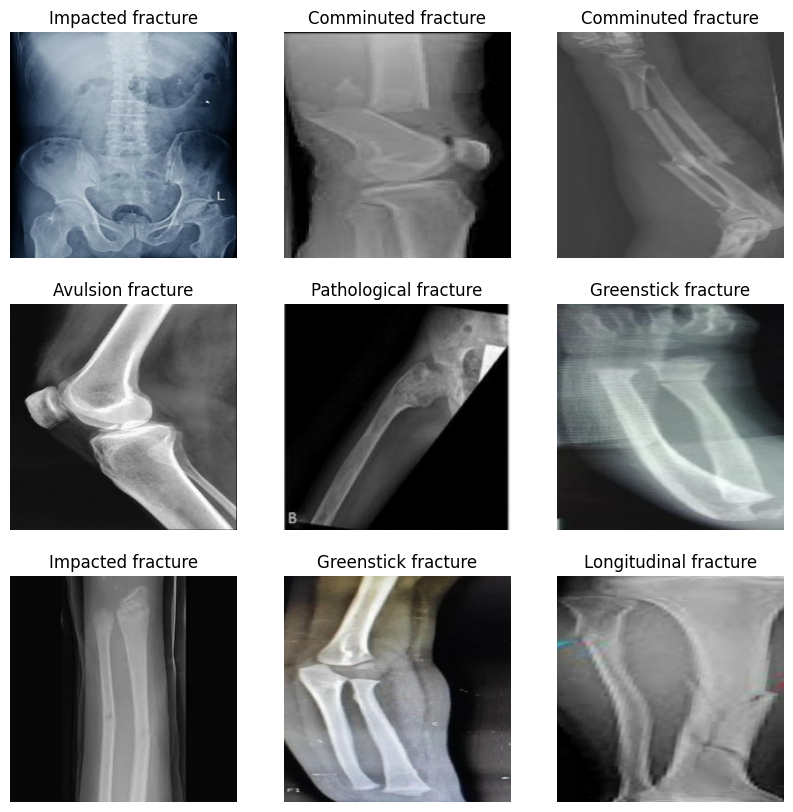

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_x[i].numpy().astype("uint8"))
    plt.title(classes[int(train_y[i])])
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 254, 254, 60)      1680      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 127, 127, 60)      0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 125, 125, 120)     64920     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 62, 62, 120)       0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 461280)          

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x,train_y,epochs=10,validation_data=(val_x,val_y))

Epoch 1/10
 4/32 [==>...........................] - ETA: 4:20 - loss: 10.3369 - accuracy: 0.1406

In [ ]:
model.evaluate(val_x,val_y)

32/32 [==============================] - 1s 35ms/step - loss: 0.0428 - accuracy: 0.9961


[0.042771752923727036, 0.9960668683052063]

In [ ]:
print(val_x[0].shape)

(256, 256, 3)


In [ ]:
np.argmax(model.predict(val_x[25].numpy().reshape(1,256,256,3)))


1/1 [==============================] - 0s 24ms/step


3

In [ ]:
print(val_y[25])


tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))